Question 1

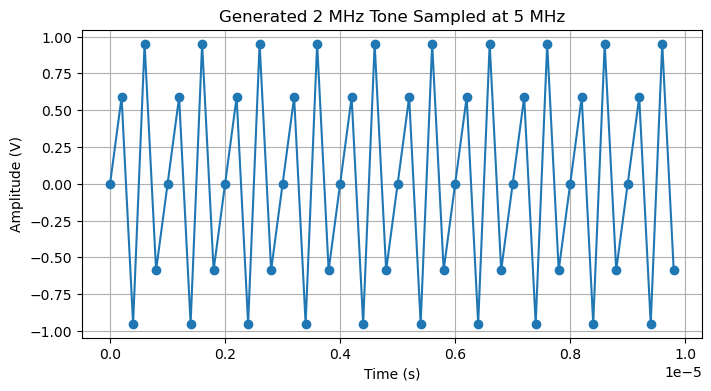

In [24]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

F1 = 2e6
Fs = 5e6
T = 0.001
t = np.arange(0, T, 1/Fs)

x_t = np.sin(F1*2*np.pi*t)

plt.figure(figsize=(8,4))
plt.plot(t[:50], x_t[:50], marker='o')  #plot 50 samples
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.title("Generated 2 MHz Tone Sampled at 5 MHz")
plt.grid()
plt.show()


Question 1.a

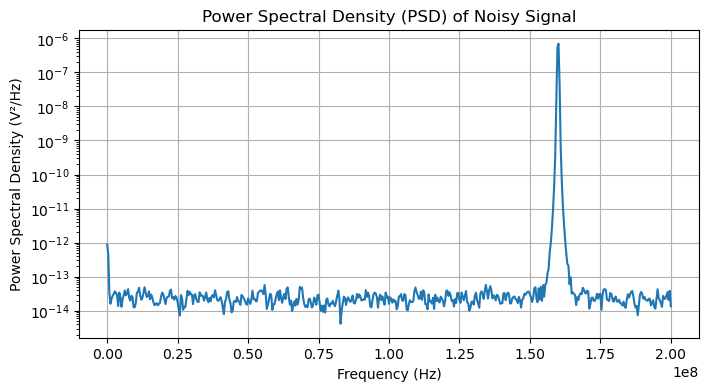

Gaussian noise variance: 5.000000e-06
Uniform noise parameter a: 3.872983e-03


In [84]:
from scipy.signal import welch, get_window

SNR_dB = 50
P_signal = (1**2) / 2
sigma2_gaussian = P_signal / (10**(SNR_dB / 10))
sigma_gaussian = np.sqrt(sigma2_gaussian)

#generate Gaussian noise
noise_gaussian = np.random.normal(0, sigma_gaussian, len(t))

#noisy signal
x_noisy = x_t + noise_gaussian

#compute PSD using Welch’s method
f, PSD = welch(x_noisy, Fs, nperseg=1024)

# Plot the PSD
plt.figure(figsize=(8, 4))
plt.semilogy(f, PSD)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (V²/Hz)")
plt.title("Power Spectral Density (PSD) of Noisy Signal")
plt.grid()
plt.show()

#compute variance for uniform noise
sigma2_uniform = sigma2_gaussian  #same noise power
a_uniform = np.sqrt(3 * sigma2_uniform)  #uniform distribution parameter

print(f"Gaussian noise variance: {sigma2_gaussian:.6e}")
print(f"Uniform noise parameter a: {a_uniform:.6e}")

Question 1.b

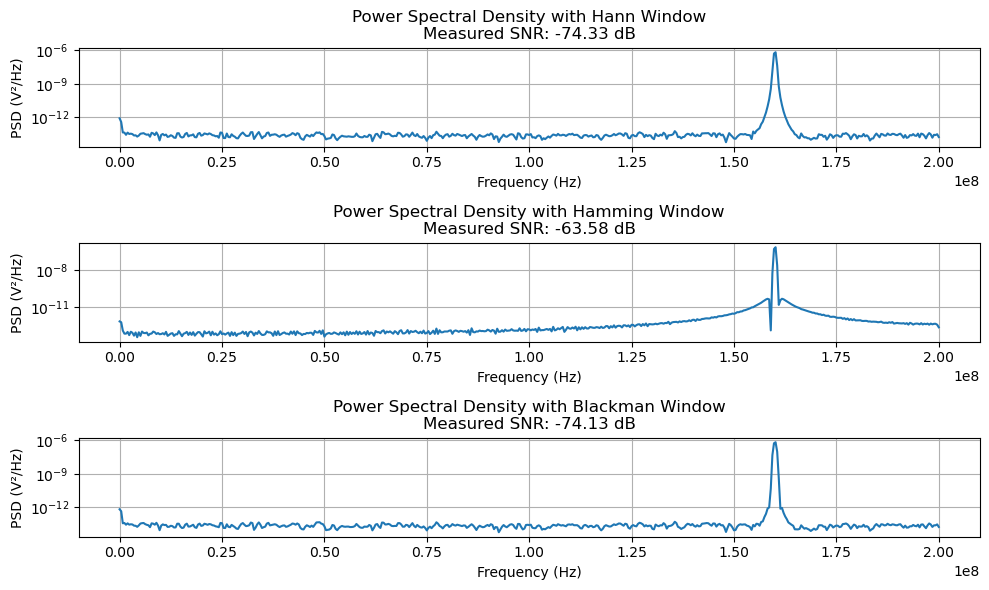

In [82]:
window_types = ["hann", "hamming", "blackman"]
nperseg = 1024

plt.figure(figsize=(10, 6))

for i, win_type in enumerate(window_types):
    #create window
    window = get_window(win_type, nperseg)
    
    K = 1/np.mean(window**2)
    
    #compute PSD with windowing
    f, PSD = welch(x_noisy, Fs, window=window, nperseg=nperseg)
    
    #compute SNR from PSD
    P_signal_estimated = np.sum(PSD[(f >= F1-Fs/nperseg) & (f <= F1+Fs/nperseg)])
    P_noise_estimated = np.sum(PSD[(f > F1+Fs/nperseg) | (f < F1-Fs/nperseg)])
    
    SNR = 10 * np.log10(P_signal_estimated/P_noise_estimated)
    
    #plot PSD
    plt.subplot(3, 1, i+1)
    plt.semilogy(f, PSD)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD (V²/Hz)")
    plt.title(f"Power Spectral Density with {win_type.capitalize()} Window\nMeasured SNR: {SNR:.2f} dB")
    plt.grid()

plt.tight_layout()
plt.show()

Question 2.a

In [100]:
F1 = 200e6
Fs = 400e6
N = 6
T = 1/F1
t1 = np.arange(0, 30*T, 1/Fs)
t2 = np.arange(0, 100*T, 1/Fs)

#Signals
x1_t = np.sin(2*np.pi*F1*t1)
x2_t = np.sin(2*np.pi*F1*t2)

Q_levels = 2**N # 6-bit quantization levels
V_max = 1  # Full-scale voltage (assume ±1V range)
Q_step = (V_max)/Q_levels  # Quantization step

# Quantization function
def quantize(signal, Q_step, V_max):
    signal_q = np.round(signal/Q_step)*Q_step
    signal_q = np.clip(signal_q, -V_max+Q_step/2, V_max-Q_step/2)
    return signal_q

# Apply quantization
x1_q = quantize(x1_t, Q_step, V_max)
x2_q = quantize(x2_t, Q_step, V_max)

